In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set_palette('colorblind')
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
trump_tweets = pd.read_csv('realdonaldtrump_tweets.csv')
clinton_tweets = pd.read_csv('hillaryclinton_tweets.csv')

trump_tweets["author"] = "Trump"
clinton_tweets["author"] = "Clinton"

tweets = pd.concat([trump_tweets, clinton_tweets])
tweets = tweets[[ u'id', u'text', u'created_at', u'favorite_count', u'retweet_count', u'author']]
tweets["id"] = tweets["id"].astype("str")
tweets = tweets.reset_index()
tweets = tweets.drop("index",1)
tweets.head()

,id,text,created_at,favorite_count,retweet_count,author
0,783436108176629760,Thank you ARIZONA! This is a MOVEMENT like nob...,Tue Oct 04 22:38:18 +0000 2016,4229.0,1729.0,Trump
1,783393314309484544,My childcare plan makes a difference for worki...,Tue Oct 04 19:48:15 +0000 2016,11110.0,4719.0,Trump
2,783391423663964160,I will be watching the great Governor @Mike_Pe...,Tue Oct 04 19:40:44 +0000 2016,14211.0,4809.0,Trump
3,783390310969651200,"Join me in Reno, Nevada tomorrow at 3:30pm! #A...",Tue Oct 04 19:36:19 +0000 2016,5743.0,2053.0,Trump
4,783149570721144832,"Join me in Reno, Nevada on Wednesday at 3:30pm...",Tue Oct 04 03:39:42 +0000 2016,13895.0,6189.0,Trump


In [3]:
def percentInCaps(s):
    inCaps = sum(1 for c in s if c.isupper())
    inLowerCase = sum(1 for c in s if c.islower())
    return inCaps/float(inCaps + inLowerCase) 

def num_hashtags(s):
    return sum(1 for c in s if c == "#")

def num_mentions(s):
    return sum(1 for c in s if c == "@")

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'
def percentPunctuation(s):
    return sum(1 for c in s if c in punctuation)/float(len(s))
    
tweets["percentPunctuation"] = tweets["text"].apply(lambda x: percentPunctuation(x)) 
tweets["percentInCaps"] = tweets["text"].apply(lambda x: percentInCaps(x))    
tweets["numHastags"] = tweets["text"].apply(lambda x: num_hashtags(x))
tweets["numMentions"] = tweets["text"].apply(lambda x: num_mentions(x))

# Get a summary of Clinton vs. Trump Tweet attributes
tweets.groupby("author").mean()

,favorite_count,retweet_count,percentPunctuation,percentInCaps,numHastags,numMentions
author,,,,,,
Clinton,5991.002167,3144.962229,0.063471,0.093032,0.129102,0.491022
Trump,16600.378303,5974.324837,0.059060,0.139253,0.478707,0.661486


In [4]:
# Extract month,day,and hour from timestamp and append back to data frame
tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets["hour"] = tweets["created_at"].apply(lambda x: x.hour)
tweets["day"] = tweets["created_at"].apply(lambda x: x.weekday())
tweets["month"] = tweets["created_at"].apply(lambda x: x.month)

# Take a look at the new frame
tweets.head()

,id,text,created_at,favorite_count,retweet_count,author,percentPunctuation,percentInCaps,numHastags,numMentions,hour,day,month
0,783436108176629760,Thank you ARIZONA! This is a MOVEMENT like nob...,2016-10-04 22:38:18,4229.0,1729.0,Trump,0.056338,0.330275,0,0,22,1,10
1,783393314309484544,My childcare plan makes a difference for worki...,2016-10-04 19:48:15,11110.0,4719.0,Trump,0.060606,0.068627,1,0,19,1,10
2,783391423663964160,I will be watching the great Governor @Mike_Pe...,2016-10-04 19:40:44,14211.0,4809.0,Trump,0.033333,0.075269,0,1,19,1,10
3,783390310969651200,"Join me in Reno, Nevada tomorrow at 3:30pm! #A...",2016-10-04 19:36:19,5743.0,2053.0,Trump,0.093750,0.217391,2,0,19,1,10
4,783149570721144832,"Join me in Reno, Nevada on Wednesday at 3:30pm...",2016-10-04 03:39:42,13895.0,6189.0,Trump,0.079365,0.217391,1,0,3,1,10


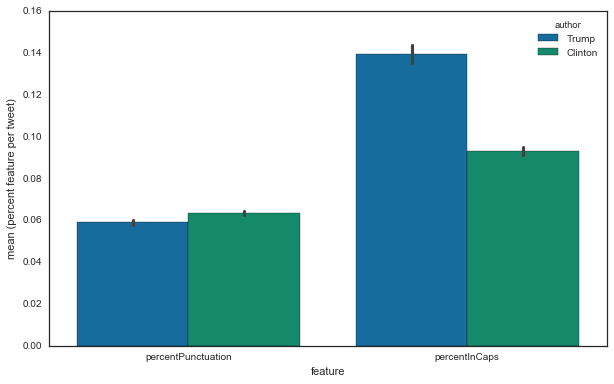

In [5]:
# Draw bar plots comparing Hillary and Donald by % in CAPS and % of punctuation

value_matrix = pd.DataFrame(columns=["author", "feature", "value"])
for i in tweets[["author", "percentPunctuation", "percentInCaps"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "percentPunctuation", i[1]["percentPunctuation"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "percentInCaps", i[1]["percentInCaps"]]

sns.barplot(data=value_matrix, hue="author", x="feature", y="value").set(ylabel='mean (percent feature per tweet)')

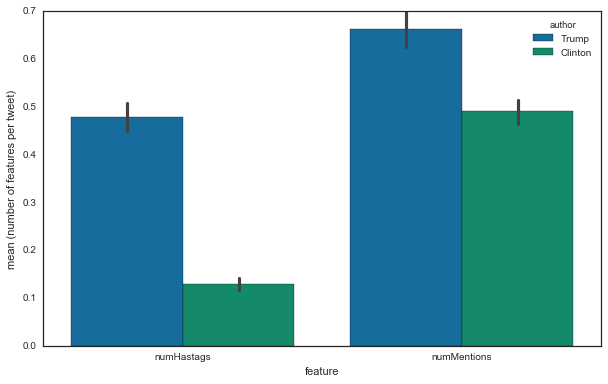

In [6]:
# Draw bar plots comparing Hillary and Donald by number of #s and @s per tweet

value_matrix = pd.DataFrame(columns=["author", "feature", "value"])
for i in tweets[["author", "numHastags", "numMentions"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "numHastags", i[1]["numHastags"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "numMentions", i[1]["numMentions"]]

sns.barplot(data=value_matrix, hue="author", x="feature", y="value").set(ylabel='mean (number of features per tweet)')

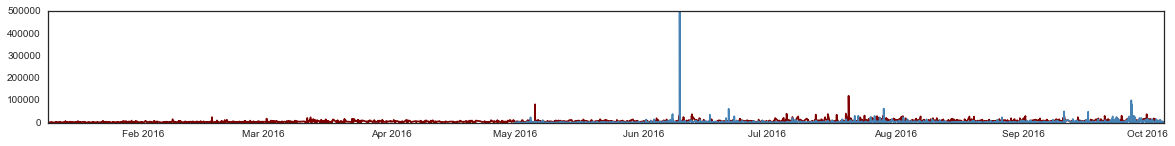

In [7]:
# Create timeseries graph for Trump vs. Hillary retweets counts

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "retweet_count", "author"]]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.plot(trump["created_at"], trump["retweet_count"], "maroon", clinton["created_at"], clinton["retweet_count"], "steelblue")
plt.show()

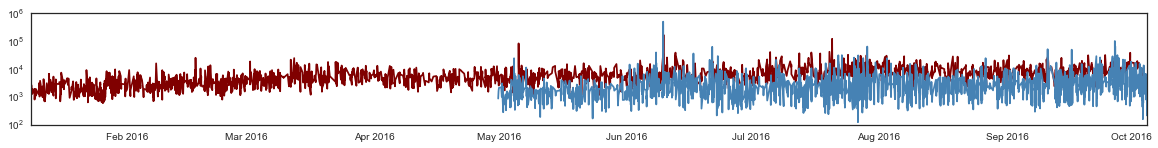

In [8]:
# Use log scale

plt.yscale('log')
plt.plot(trump["created_at"], trump["retweet_count"], "maroon", clinton["created_at"], clinton["retweet_count"], "steelblue")
plt.show()

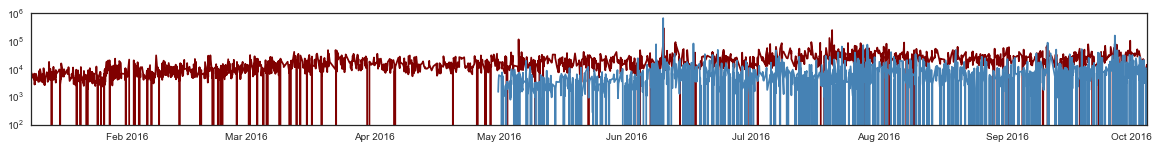

In [9]:
# Create timeseries graph for Trump vs. Hillary favorite counts

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "favorite_count", "author"]]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.yscale('log')
plt.plot(trump["created_at"], trump["favorite_count"], "maroon", clinton["created_at"], clinton["favorite_count"], "steelblue")
plt.show()

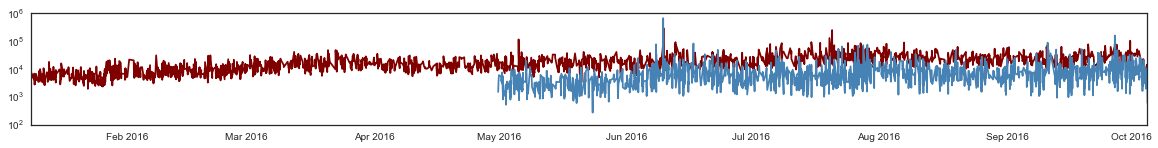

In [10]:
# Exclude tweets that have 0 likes, presumably because they're retweets

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "favorite_count", "author"]]
value_matrix = value_matrix[value_matrix["favorite_count"] != 0]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.yscale('log')
plt.plot(trump["created_at"], trump["favorite_count"], "maroon", clinton["created_at"], clinton["favorite_count"], "steelblue")
plt.show()